In [68]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from kneed import KneeLocator #para mostrar o número de grupos ideal do agrupamento
from sklearn.cluster import KMeans #Importando a função Kmeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler #Função utilizada para normalização dos dados
from sklearn.datasets import load_iris

In [14]:
data = load_iris()
features = data.data
features[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [15]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
x = scaler.fit_transform(features)
x[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [17]:
# Determinando a Silhouette para número máximo de cluster estimado (Raiz(instâncias/2)
limit = int((x.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(x)
    pred = model.predict(x)
    score = silhouette_score(x, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

Silhouette Score k = 2: 0.630
Silhouette Score k = 3: 0.505
Silhouette Score k = 4: 0.445
Silhouette Score k = 5: 0.351
Silhouette Score k = 6: 0.348
Silhouette Score k = 7: 0.333
Silhouette Score k = 8: 0.326


Silhouette Score k = 2: 0.630
Silhouette Score k = 3: 0.505
Silhouette Score k = 4: 0.445
Silhouette Score k = 5: 0.353
Silhouette Score k = 6: 0.356
Silhouette Score k = 7: 0.336
Silhouette Score k = 8: 0.331


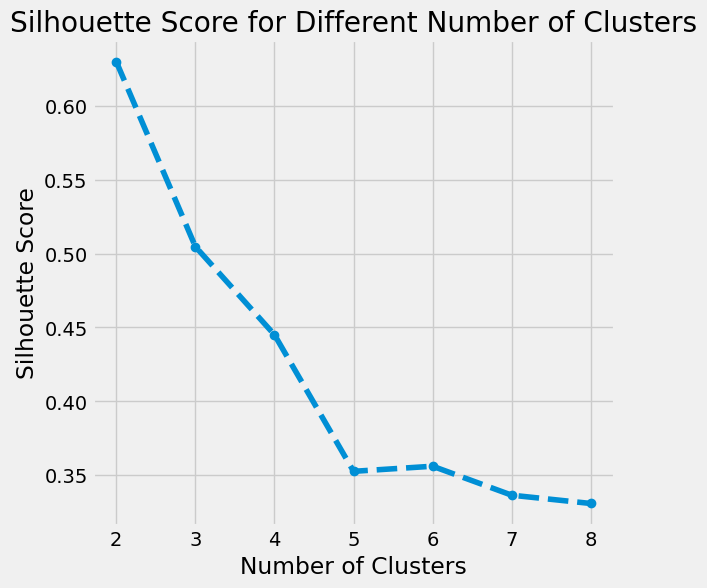

In [28]:
def plot_silhouette_scores(X, limit):
    # Lists to store the silhouette scores and cluster numbers
    silhouette_scores_list = []
    cluster_nums = []
    
    for k in range(2, limit+1):
        model = KMeans(n_clusters=k, n_init=10)
        model.fit(X)
        pred = model.predict(X)
        score = silhouette_score(X, pred)
        silhouette_scores_list.append(score)
        cluster_nums.append(k)
        print('Silhouette Score k = {}: {:<.3f}'.format(k, score))
    
    # Plotting the silhouette scores for each number of clusters
    plt.figure(figsize=(6, 6))
    plt.plot(cluster_nums, silhouette_scores_list, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Different Number of Clusters')
    plt.grid(True)
    plt.show()

# Call the function with the provided limit
plot_silhouette_scores(x, limit)

In [19]:
wcss = []
for i in range(2, 11):
  #print(i)
  kmeans = KMeans(n_clusters=i, random_state=10, n_init=10)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

**Usando o método Elbow para encontrar o número ideal de clusters**

In [20]:
wcss

[12.127790750538193,
 6.982216473785235,
 5.516933472040371,
 4.5889131607247995,
 3.9387518693982426,
 3.4736223207332464,
 3.139189396692217,
 2.867522633908577,
 2.53511122524266]

**Vamos analisar o ponto de inflexão dessa curva?**

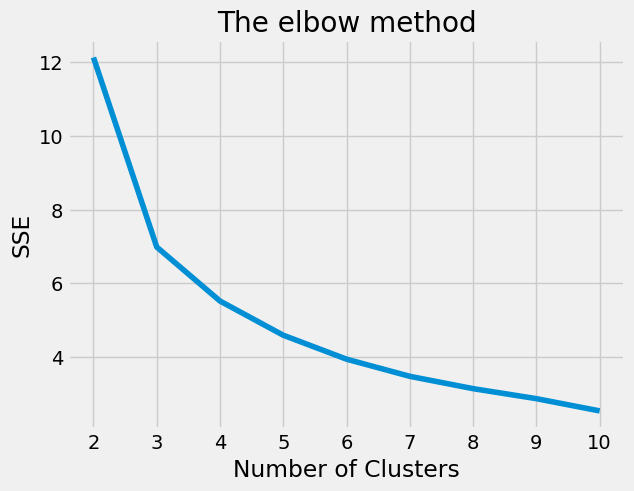

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11))
plt.title('The elbow method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [22]:
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

4

# Davies-Bouldin Index

In [ ]:
# Collect DBI scores for different number of clusters
dbi_scores = []
cluster_numbers = list(range(2, limit+1))

for k in range(2, limit+1):
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(x)
    pred = model.predict(x)
    dbi = davies_bouldin_score(x, pred)
    dbi_scores.append(dbi)
    print(f'Davies-Bouldin Index for k = {k}: {dbi:.3f}')

# Plotting DBI scores
plt.figure(figsize=(6,6))
plt.plot(cluster_numbers, dbi_scores, marker='o', linestyle='-')
plt.title('Davies-Bouldin Index for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.gca().invert_yaxis()  # Invert the y-axis as lower DBI is better
plt.show()

# Plot dos clusters gerados

In [46]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
saida_kmeans = kmeans.fit_predict(x)
saida_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

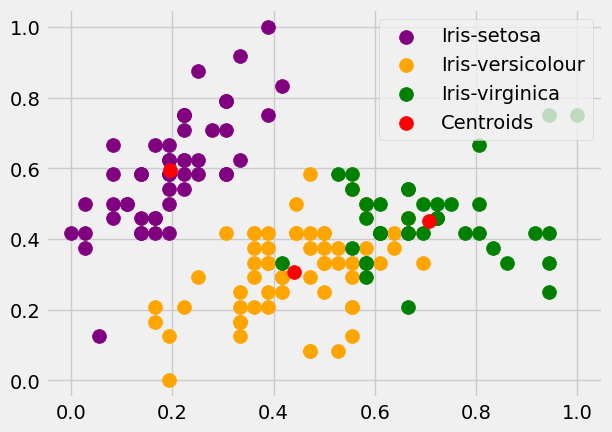

In [47]:
#Visualising the clusters
plt.scatter(x[saida_kmeans == 1, 0], x[saida_kmeans == 1, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[saida_kmeans == 0, 0], x[saida_kmeans == 0, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[saida_kmeans == 2, 0], x[saida_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

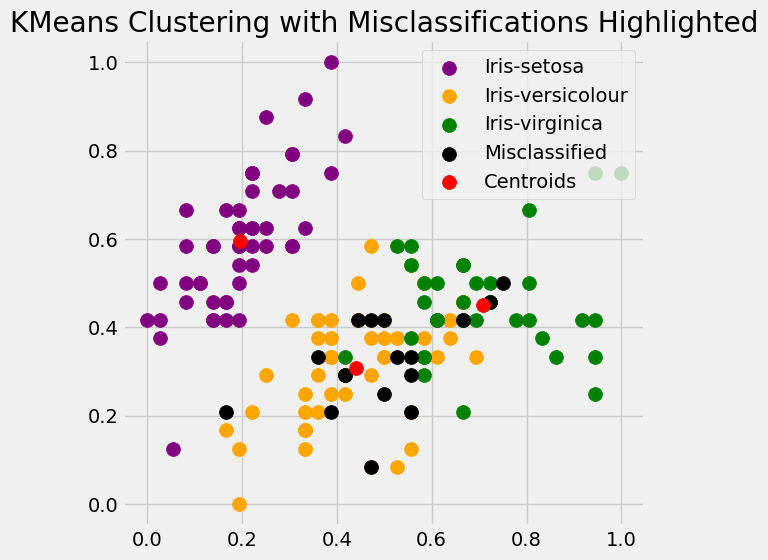

In [59]:
direct_comparison_labels = np.where(saida_kmeans == 0, 1, np.where(saida_kmeans == 1, 0, 2))
incorrectly_classified_direct = (direct_comparison_labels != data.target)

plt.figure(figsize=(6, 6))

# Correctly classified points
plt.scatter(x[~incorrectly_classified_direct & (direct_comparison_labels == 0), 0], x[~incorrectly_classified_direct & (direct_comparison_labels == 0), 1], s=100, c='purple', label='Iris-setosa')
plt.scatter(x[~incorrectly_classified_direct & (direct_comparison_labels == 1), 0], x[~incorrectly_classified_direct & (direct_comparison_labels == 1), 1], s=100, c='orange', label='Iris-versicolour')
plt.scatter(x[~incorrectly_classified_direct & (direct_comparison_labels == 2), 0], x[~incorrectly_classified_direct & (direct_comparison_labels == 2), 1], s=100, c='green', label='Iris-virginica')

# Incorrectly classified points (highlighted with black border)
plt.scatter(x[incorrectly_classified_direct, 0], x[incorrectly_classified_direct, 1], s=100, c='black', label='Misclassified')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=100, c='red', label='Centroids')
plt.legend()
plt.title('KMeans Clustering with Misclassifications Highlighted')
plt.show()

In [62]:
mapped_labels = np.where(saida_kmeans == 0, 1, np.where(saida_kmeans == 1, 0, 2))
accuracy = accuracy_score(data.target, mapped_labels)
accuracy

0.8866666666666667

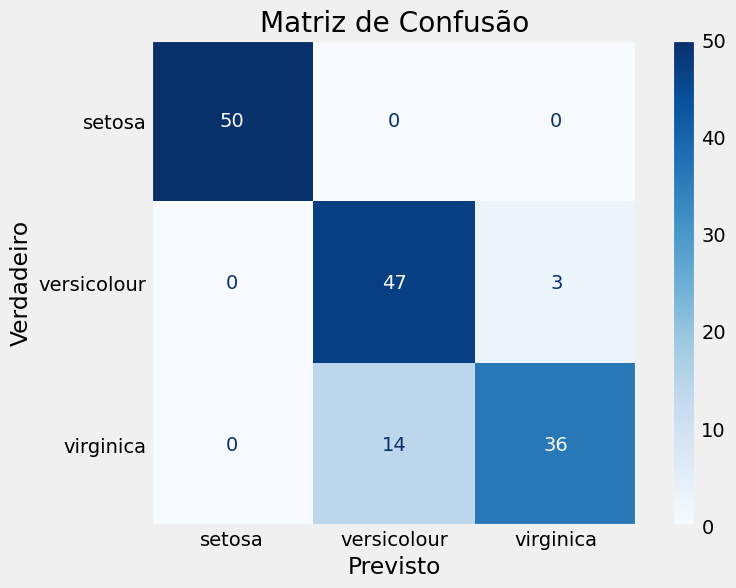

In [69]:
# Generate confusion matrix
conf_matrix = confusion_matrix(data.target, mapped_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['setosa', 'versicolour', 'virginica'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
ax.grid(False)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()
